In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ParameterGrid
%matplotlib inline
import random

In [1]:
import motif_processor
reload(motif_processor)

<module 'motif_processor' from 'motif_processor.pyc'>

In [2]:
MotifProcObj = motif_processor.MotifProcessor(ENCODE_only=True, 
                                                   cell_line="HepG2", 
                                                  meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/HepG2_pos_steme/steme.txt")
motif_tensor, motif_names = MotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)


In [3]:
import theano.sandbox.cuda
theano.sandbox.cuda.use('gpu1')

Using gpu device 1: TITAN X (Pascal) (CNMeM is disabled, cuDNN 5105)
/home/alvin/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [4]:
HepG2MotifProcObj = motif_processor.MotifProcessor(ENCODE_only=False, 
                                                   cell_line="HepG2", 
                                                   meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/HepG2_pos_steme/steme.txt")
HepG2_motif_tensor, HepG2_motif_names = HepG2MotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)

K562MotifProcObj = motif_processor.MotifProcessor(ENCODE_only=False, 
                                                   cell_line="K562", 
                                                   meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/K562_pos_steme/steme.txt")
K562_motif_tensor, K562_motif_names = K562MotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)


LCLMotifProcObj = motif_processor.MotifProcessor(ENCODE_only=False, 
                                                   cell_line="LCL", 
                                                   meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/LCL_pos_steme/steme.txt")
LCL_motif_tensor, LCL_motif_names = LCLMotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)
MotifProcObj = motif_processor.MotifProcessor(ENCODE_only=True, 
                                                   cell_line="HepG2", 
                                                  meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/HepG2_pos_steme/steme.txt")
motif_tensor, motif_names = MotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)


In [5]:
motifDistanceProcessorObj = motif_processor.MotifDistanceProcessor([],[],[])
binary_mat = motifDistanceProcessorObj.process_Pouya(motif_names)

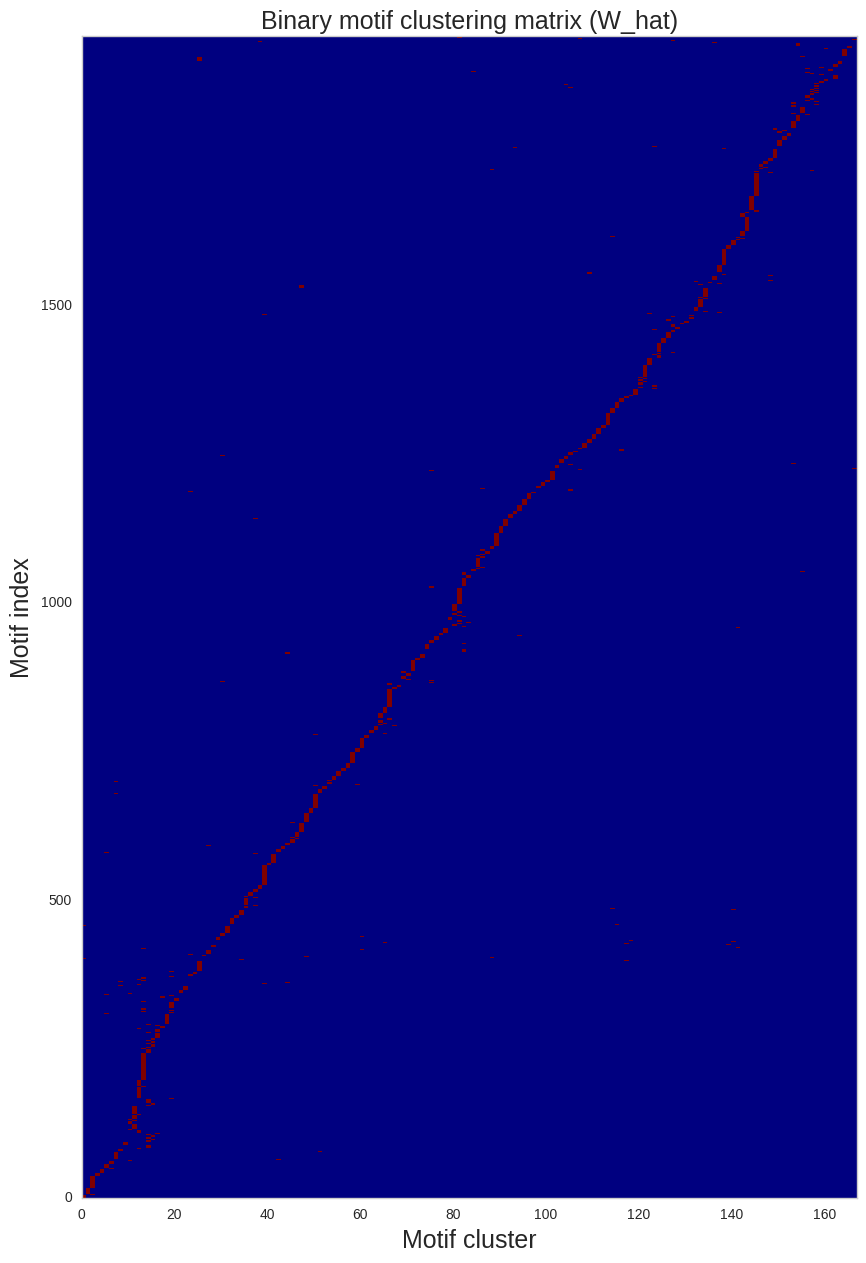

In [14]:
plt.figure(figsize=(10,15))
plt.pcolor(binary_mat,cmap='jet')
plt.axis('tight')
plt.xlabel('Motif cluster',fontsize=18)
plt.ylabel('Motif index',fontsize=18)
plt.title("Binary motif clustering matrix (W_hat)",fontsize=18)
plt.savefig("clustered_binary_motifs.png", dpi=300)
plt.show()

In [8]:
import common_utils
reload(common_utils)

/home/alvin/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/home/alvin/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/alvin/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<module 'common_utils' from 'common_utils.pyc'>

In [9]:
CrossValProcObj = common_utils.CrossValProcessor(output_dirs = ["./HEPG2_act_1_31/", "./HEPG2_rep_1_31/", 
                                                                      "./K562_act_1_31/", "./K562_act_1_31/",
                                                                      "./LCL_act_alt_1_31/"])

HepG2_binObj = CrossValProcObj.HepG2_binObj
K562_binObj = CrossValProcObj.K562_binObj
LCL_binObj = CrossValProcObj.LCL_binObj
binObjs = [HepG2_binObj, K562_binObj, LCL_binObj]
CvDicts = [CrossValProcObj.HepG2_dict, CrossValProcObj.K562_dict, CrossValProcObj.LCL_dict]
motif_tensors = [motif_tensor, motif_tensor, motif_tensor]
motif_names = [motif_names, motif_names, motif_names]
names=["HepG2", "K562", "LCL"]
dirs = ["./HepG2_1_31/", "./K562_1_31/", "./LCL_1_31/"]


In [10]:
import cv_engine 
reload(cv_engine)

Using Theano backend.


<module 'cv_engine' from 'cv_engine.pyc'>

In [11]:
HepG2DataConvObj = cv_engine.DataConvolver(HepG2_binObj.merged_tensor, HepG2_binObj.merged_RC_tensor, HepG2_binObj.merged_tar, motif_tensor.shape, features_mat=HepG2_binObj.features_mat, should_conv=False)
K562DataConvObj = cv_engine.DataConvolver(K562_binObj.merged_tensor, K562_binObj.merged_RC_tensor, K562_binObj.merged_tar, motif_tensor.shape, features_mat=K562_binObj.features_mat,should_conv=False) 
LCLDataConvObj = cv_engine.DataConvolver(LCL_binObj.merged_tensor, LCL_binObj.merged_RC_tensor, LCL_binObj.merged_tar, motif_tensor.shape,features_mat=LCL_binObj.features_mat, should_conv=False) 

In [41]:
import keras_motif
reload(keras_motif)

<module 'keras_motif' from 'keras_motif.pyc'>

In [37]:
def Process(param_list):
    binObjs = [HepG2DataConvObj,K562DataConvObj,LCLDataConvObj]
    names=['HepG2','K562','LCL']
    model_names = ['Meta', 'Double', 'Simple']
    pool_width = param_list['pool_width']
    weighted = param_list['weighted']
    L2 = param_list['L2']
    L1 = param_list['L1']
    dropout = param_list['dropout']
    results_dict = {}
    results_dict['parameters']=param_list
    results_dict['training_history']=[]
    results_dict['performance']=[]
    for idx, binObj in enumerate(binObjs):
        cur_name = names[idx]
        if idx == 0:
            testObj1 = binObjs[1]
            testName1 = names[1]
            testObj2 = binObjs[2]
            testName2 = names[2]
        if idx == 1:
            testObj1 = binObjs[0]
            testName1 = names[0]
            testObj2 = binObjs[2]
            testName2 = names[2]       
        if idx == 2:
            testObj1 = binObjs[1]
            testName1 = names[1]
            testObj2 = binObjs[2]
            testName2 = names[2]
        model1 = keras_motif.MetaKerasModel(binObj, motif_tensor, binary_mat)
        model2 = keras_motif.DoubleKerasModel(binObj, motif_tensor)
        model3 = keras_motif.SimpleKerasModel(binObj)
        Models = [model1, model2, model3]
        for model_idx, Model in enumerate(Models):
            Model.build_model(dropout=dropout, L1=L1, L2=L2, pool_width=pool_width, weighted=weighted)
            pos_weight, neg_weight = cv_engine.get_weights(binObj.Y)
            train_history = Model.train(binObj.X, binObj.X_RC, binObj.features_mat, binObj.Y, neg_weight, pos_weight) 
            results_dict['training_history'].append(train_history)
            testPred1 = Model.predict(testObj1.X, testObj1.X_RC, testObj1.features_mat)
            testPred2 = Model.predict(testObj2.X, testObj2.X_RC, testObj2.features_mat)
            testResult1 = str(common_utils.ClassificationResult(testObj1.Y.astype(bool),testPred1.flatten()))
            testResult2 = str(common_utils.ClassificationResult(testObj2.Y.astype(bool),testPred2.flatten()))
            result1 = '%s\t%s\t%s\t%i\t%i\t%0.04f\t%0.04f\t%0.02f\t%s'%(cur_name, model_names[model_idx], testName1, int(pool_width), int(weighted), L1,L2,dropout, testResult1)
            result2 = '%s\t%s\t%s\t%i\t%i\t%0.04f\t%0.04f\t%0.02f\t%s'%(cur_name, model_names[model_idx], testName2, int(pool_width), int(weighted), L1,L2,dropout, testResult2)
            print result1
            print result2
            results_dict['performance'].append(result1)
            results_dict['performance'].append(result2)
    return results_dict
    

In [39]:
param_grid = {'pool_width':[2,3,4,5,6,8,12,14,20,61], 'weighted': [True, False],'L2':[0,0.0001,0.01,0.1,1], 'L1': [0,0.001,0.1,1], 'dropout':[0,0.1,0.2]}
param_list = list(ParameterGrid(param_grid))
param_list = param_list[::-1]
random.shuffle(param_list)

In [ ]:
results = map(Process, param_list)

HepG2	Meta	K562	61	1	0.0000	0.0000	0.10	nan	70.7281	0.7524	0.4188	0.8430	0.0000	0.0000	0.0000	0.0000	1595.0000	11398.0000
HepG2	Meta	LCL	61	1	0.0000	0.0000	0.10	nan	54.3499	0.5349	0.2142	0.3838	0.0000	0.0000	0.0000	0.0000	2770.0000	18100.0000
HepG2	Double	K562	61	1	0.0000	0.0000	0.10	nan	78.1410	0.8447	0.5473	0.9239	0.0000	0.0000	10.8464	20.5016	1595.0000	11398.0000
HepG2	Double	LCL	61	1	0.0000	0.0000	0.10	nan	58.0073	0.6219	0.2842	0.6259	0.0000	0.0000	0.0000	3.0686	2770.0000	18100.0000
HepG2	Simple	K562	61	1	0.0000	0.0000	0.10	nan	74.4600	0.7971	0.5005	0.9004	0.0000	0.0000	0.0000	19.1223	1595.0000	11398.0000
HepG2	Simple	LCL	61	1	0.0000	0.0000	0.10	nan	57.5444	0.6014	0.2881	0.5983	0.0000	0.0000	0.0000	0.0000	2770.0000	18100.0000
K562	Meta	HepG2	61	1	0.0000	0.0000	0.10	nan	54.3592	0.5314	0.2657	0.5043	0.0000	0.0000	0.0000	0.0000	1691.0000	10478.0000
K562	Meta	LCL	61	1	0.0000	0.0000	0.10	nan	56.3898	0.5878	0.2749	0.5705	0.0000	0.0000	0.0000	0.0000	2770.0000	18100.0000
K562	Double	HepG2	

In [32]:
x

[5, 1, 2, 8, 4, 0]

In [35]:
random.shuffle(x)

In [36]:
x

[4, 0, 5, 2, 1, 8]